In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [335]:
url1 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'
url2 = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
    
f = pd.read_csv(url1, sep=',')
w = pd.read_csv(url2, sep=',')

In [336]:
f.tail(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
336766,336767,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301,22.0,40.0
336767,336768,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264,22.0,41.0
336768,336769,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187,23.0,7.0
336769,336770,2013,9,30,2349.0,-10.0,325.0,-25.0,B6,N516JB,745,JFK,PSE,196.0,1617,23.0,49.0
336770,336771,2013,9,30,NaN,NaN,NaN,NaN,EV,N740EV,5274,LGA,BNA,NaN,764,NaN,NaN
336771,336772,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3393,JFK,DCA,NaN,213,NaN,NaN
336772,336773,2013,9,30,NaN,NaN,NaN,NaN,9E,NaN,3525,LGA,SYR,NaN,198,NaN,NaN
336773,336774,2013,9,30,NaN,NaN,NaN,NaN,MQ,N535MQ,3461,LGA,BNA,NaN,764,NaN,NaN
336774,336775,2013,9,30,NaN,NaN,NaN,NaN,MQ,N511MQ,3572,LGA,CLE,NaN,419,NaN,NaN
336775,336776,2013,9,30,NaN,NaN,NaN,NaN,MQ,N839MQ,3531,LGA,RDU,NaN,431,NaN,NaN


In [337]:
#1

filt_f=f[f.dep_delay>0]
data=pd.DataFrame(filt_f.groupby([filt_f.month])['dep_delay'].size().reset_index(name='Count'))
print(data)
#len(data.month)

    month  Count
0       1   9662
1       2   9124
2       3  11209
3       4  10543
4       5  11291
5       6  12655
6       7  13909
7       8  11713
8       9   7815
9      10   8722
10     11   8239
11     12  13550


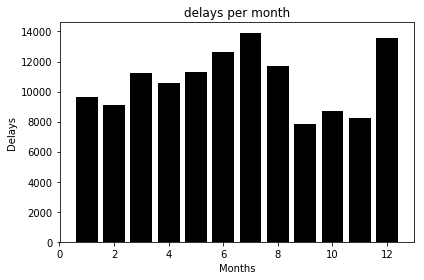

In [338]:

plt.bar(data.month, data.Count, color="black")
plt.ylabel('Delays')
plt.xlabel('Months')
plt.title('delays per month')
plt.tight_layout()
plt.show()

Наибольшие задержки в декабре, июне и июле, когда большая часть людей отправляется на выходные, соответственно в это время авиокампаниям нужно наиболее активно работать


In [341]:
#2 задержки от времени суток

filt_f=f[f.dep_delay>0]
filt_data=pd.DataFrame(filt_f.groupby([filt_f.hour])['dep_delay'].size().reset_index(name='Count'))
#print(data)
data=pd.DataFrame(f.groupby([f.hour])['dep_delay'].size().reset_index(name='Total_count'))
data_merged = pd.merge(filt_data,data, on=['hour'])
data_merged['Persentage_of_delayed_aircrafts']=(data_merged.Count/data_merged.Total_count)*100
#print(data_merged)

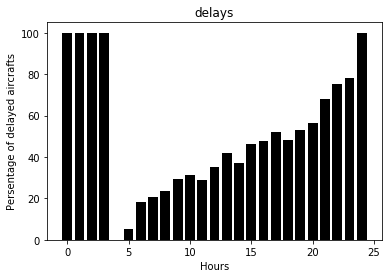

In [342]:
plt.bar(data_merged.hour, data_merged.Persentage_of_delayed_aircrafts, color='black')
plt.ylabel('Persentage of delayed aircrafts')
plt.xlabel('Hours')
plt.title('delays')
plt.show()

Наибольшие задержки приходятся на ночное время, возможно ввиду того, что большая масса персонала работает в дневное время


Поэтому возможно стоит увеличить количество персонала, работающего в ночную смену

In [343]:
#3 задержки от времени отправдения


group_f = pd.DataFrame(f.groupby(f.hour)['dep_delay'].mean().reset_index(name='Mean_delay_departure'))
print(group_f)

    hour  Mean_delay_departure
0    0.0            128.642452
1    1.0            207.049327
2    2.0            239.921875
3    3.0            304.727273
4    4.0             -5.554098
5    5.0             -4.355644
6    6.0             -1.520552
7    7.0              0.223289
8    8.0              1.091432
9    9.0              4.268295
10  10.0              5.548644
11  11.0              5.652309
12  12.0              7.601892
13  13.0              9.380639
14  14.0              8.090381
15  15.0             10.682049
16  16.0             13.621150
17  17.0             16.756593
18  18.0             18.664671
19  19.0             21.497342
20  20.0             28.266213
21  21.0             42.064964
22  22.0             68.190042
23  23.0             96.946865
24  24.0             64.862069


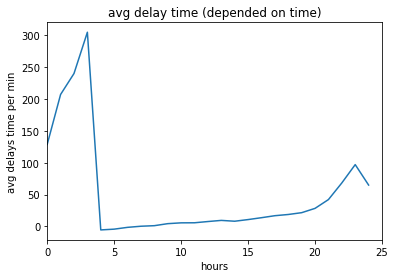

In [344]:
plt.plot(group_f.hour, group_f.Mean_delay_departure,'')
plt.xlim(0, 25)
plt.ylabel('avg delays time per min')
plt.xlabel('hours')
plt.title('avg delay time (depended on time)')
plt.show()

Опять видно что основная масса задержек приходится на ночь и ранне утро. Возможно такая тенденция связана с тем, что большинство рейсов приходится как раз на это время, откуда и такое процентное соотношение


In [345]:
#4 

night_f=f.loc[(f['hour']>=21.0) | (f['hour']<=6.0)]
day_f=f.loc[(f['hour']<21.0) & (f['hour']>6.0)]
day_value=day_f.shape[0]

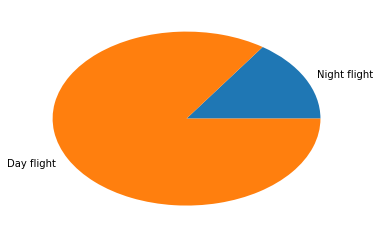

In [346]:
night_value=night_f.shape[0]
data = [night_value,day_value]
plt.pie (data,labels=['Night flight','Day flight'])

plt.show()

In [347]:
#5 среднее время задержки

group_f = f.groupby([f.month,f.day]).mean()
print(max(group_f.arr_delay)) # Cреднее время задержки прилёта
print(max(group_f.dep_delay)) # Среднее время задержки отправления

85.86215538847118
83.5369211514393


In [348]:
#6 задержки от видимости


filt_f=f[f.dep_delay>0]
groupby_for_analys = filt_f.groupby([filt_f.origin, filt_f.month,
filt_f.day, filt_f.hour])
grouped_origin_time_hour = groupby_for_analys['dep_delay'].agg([np.size, np.mean]).reset_index()
#grouped_origin_time_hour

In [349]:
dw_and_df_merged = pd.merge(grouped_origin_time_hour,w, on=['origin','day','month','hour'])
#print(dw_and_df_merged)
dw_and_df_merged = dw_and_df_merged.rename(columns={'size': 'Count', 'mean': 'TotalDelay'})
visib_fw = dw_and_df_merged.groupby([dw_and_df_merged.visib])['TotalDelay','Count' ].agg([np.mean]).reset_index()
print(visib_fw)

    visib  TotalDelay      Count
                 mean       mean
0    0.12   53.125926   9.333333
1    0.25   50.368918   9.266667
2    0.50   48.025944   8.081081
3    0.75  108.043222  10.375000
4    1.00   44.052121   8.615385
5    1.25   99.533333  15.000000
6    1.50   57.758718  10.785714
7    1.75  106.130952   7.000000
8    2.00   53.179340  10.566265
9    2.50   57.614434   9.750000
10   3.00   43.960403  11.780488
11   4.00   44.990879   9.128571
12   5.00   45.245112  10.178947
13   6.00   45.309186   7.691729
14   7.00   42.906023   8.536000
15   8.00   41.097958   8.829268
16   9.00   46.031925   9.126394
17  10.00   36.867483   7.761381


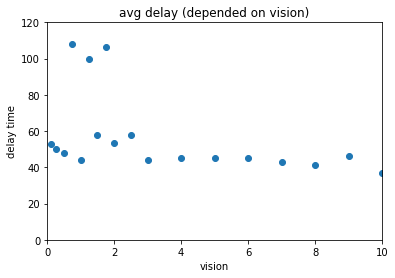

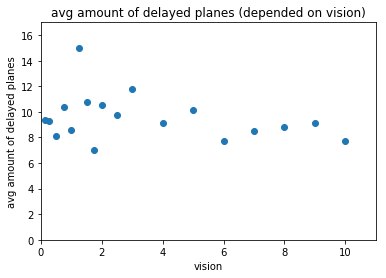

In [350]:
plt.xlim(0, 10)
plt.ylim(0, 120)
plt.scatter(visib_fw.visib,visib_fw.TotalDelay)
plt.ylabel('delay time')
plt.xlabel('vision')
plt.title('avg delay (depended on vision)')
plt.show()


plt.xlim(0, 11)
plt.ylim(0, 17)
plt.scatter(visib_fw.visib,visib_fw.Count)
plt.ylabel('avg amount of delayed planes')
plt.xlabel('vision')
plt.title('avg amount of delayed planes (depended on vision)')
plt.show()

Среднее время задержки сильно увеличивается, когда видимость меньше двух миль, и в целом большее количество задержанных рейсов происходит при такой же видимости

In [351]:
#7,8

filt_f=f[(f.dep_delay>0)&(f.arr_delay>0)]

filt_data_dep=pd.DataFrame(filt_f.groupby([filt_f.carrier])['dep_delay'].size().reset_index(name='Count'))
filt_data_arr=pd.DataFrame(filt_f.groupby([filt_f.carrier])['arr_delay'].mean().reset_index(name='Mean_arr'))
#print(data)
data_dep=pd.DataFrame(f.groupby([f.carrier])['dep_delay'].size().reset_index(name='Total_count'))
data_arr=pd.DataFrame(f.groupby([f.carrier])['arr_delay'].size().reset_index(name='Total_count'))

data_merged_dep = pd.merge(filt_data_dep,data_dep, on=['carrier'])
data_merged_arr = pd.merge(filt_data_arr,data_arr, on=['carrier'])

data_merged_dep['Persentage_of_delayed_aircrafts']=(data_merged_dep.Count/data_merged_dep.Total_count)*100

print(data_merged_dep)

   carrier  Count  Total_count  Persentage_of_delayed_aircrafts
0       9E   5055        18460                        27.383532
1       AA   6668        32729                        20.373369
2       AS    125          714                        17.507003
3       B6  16436        54635                        30.083280
4       DL  10126        48110                        21.047599
5       EV  19183        54173                        35.410629
6       F9    256          685                        37.372263
7       FL   1386         3260                        42.515337
8       HA     37          342                        10.818713
9       MQ   6944        26397                        26.306020
10      OO      8           32                        25.000000
11      UA  16606        58665                        28.306486
12      US   3765        20536                        18.333658
13      VX   1217         5162                        23.576133
14      WN   4293        12275          

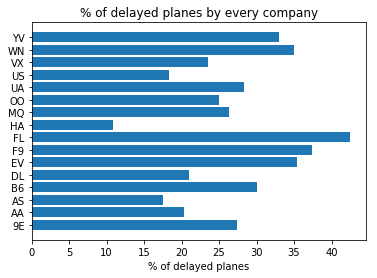

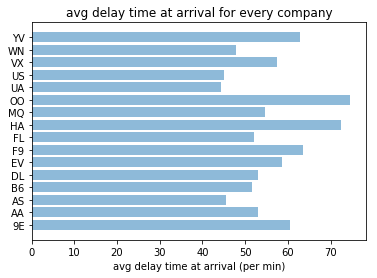

In [352]:

objects = data_merged_dep.carrier
plt.barh(data_merged_dep.carrier, data_merged_dep.Persentage_of_delayed_aircrafts, align='center', alpha=1.0)
plt.yticks(data_merged_dep.carrier, objects)
plt.xlabel('% of delayed planes')
plt.title('% of delayed planes by every company')
plt.show()

objects = data_merged_arr.carrier
plt.barh(data_merged_arr.carrier, filtered_data_arr.Mean_arr, align='center', alpha=0.5)
plt.yticks(data_merged_arr.carrier, objects)
plt.xlabel('avg delay time at arrival (per min)')
plt.title('avg delay time at arrival for every company')
plt.show()

Таким образом мы видим, что компания FL больше всего задерживает рейсы, однако их рейсы приезжают с опазданием не так часто, как компании OO и HA, несмотря на то что последняя задерживает рейсы меньше всего.